In [1]:
import warnings
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten


In [2]:
warnings.filterwarnings("ignore")

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

In [4]:

(x_train_svm, y_train_svm), (x_test_svm, y_test_svm) = mnist.load_data()

x_train_svm = x_train_svm.astype('float32') / 255
x_test_svm = x_test_svm.astype('float32') / 255

y_train_svm = to_categorical(y_train_svm, 10)*2-1
y_test_svm = to_categorical(y_test_svm, 10)*2-1  #convert labels to {-1, 1} for hinge loss

## SVM

In [5]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='linear')  #linear layer to simualte svm
])
model.compile('adam', 'hinge', metrics=['accuracy'])
start_train = time.time()
model.fit(x_train_svm, y_train_svm, batch_size=64, epochs=15, validation_data=(x_test_svm, y_test_svm))
end_train = time.time()

start_test = time.time()
test_loss, test_accuracy = model.evaluate(x_test_svm, y_test_svm)
end_test = time.time()

train_time = end_train - start_train
test_time =  end_test - start_test
avg_train_time = np.mean(train_time)
avg_test_time = np.mean(test_time)

total_params = model.count_params()

print("Test accuracy:", test_accuracy)
print("Average training time:", avg_train_time)
print("Average testing time:", avg_test_time)
print("Number of Parameters:", total_params)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6486 - loss: 0.1886 - val_accuracy: 0.8949 - val_loss: 0.0734
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8928 - loss: 0.0726 - val_accuracy: 0.9082 - val_loss: 0.0639
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 0.0648 - val_accuracy: 0.9135 - val_loss: 0.0609
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9103 - loss: 0.0618 - val_accuracy: 0.9151 - val_loss: 0.0589
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9145 - loss: 0.0593 - val_accuracy: 0.9169 - val_loss: 0.0575
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9182 - loss: 0.0577 - val_accuracy: 0.9210 - val_loss: 0.0563
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9199 - loss: 0.0565 - val_accuracy: 0.9190 - val_loss: 0.0562
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9199 - loss: 0.0564 - val_accuracy: 0.

## NN Idea

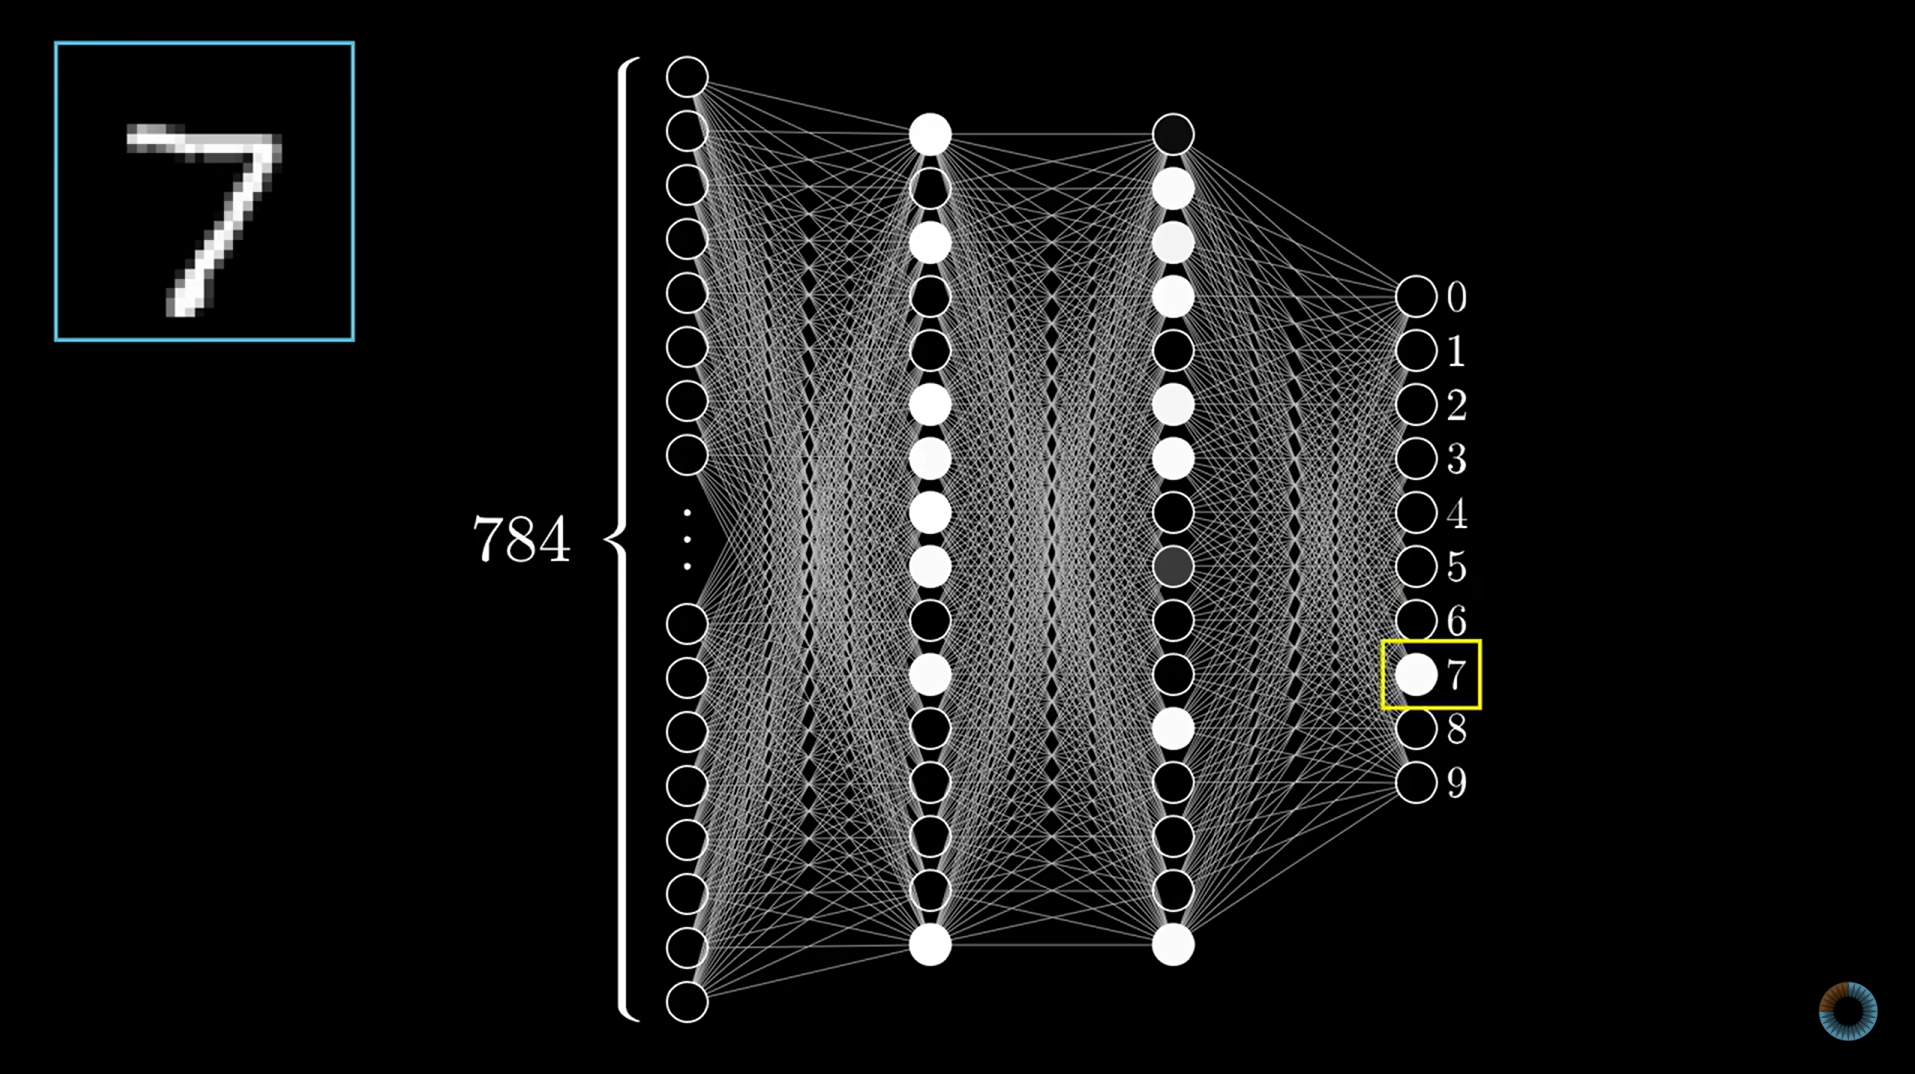

## Weights and Bias

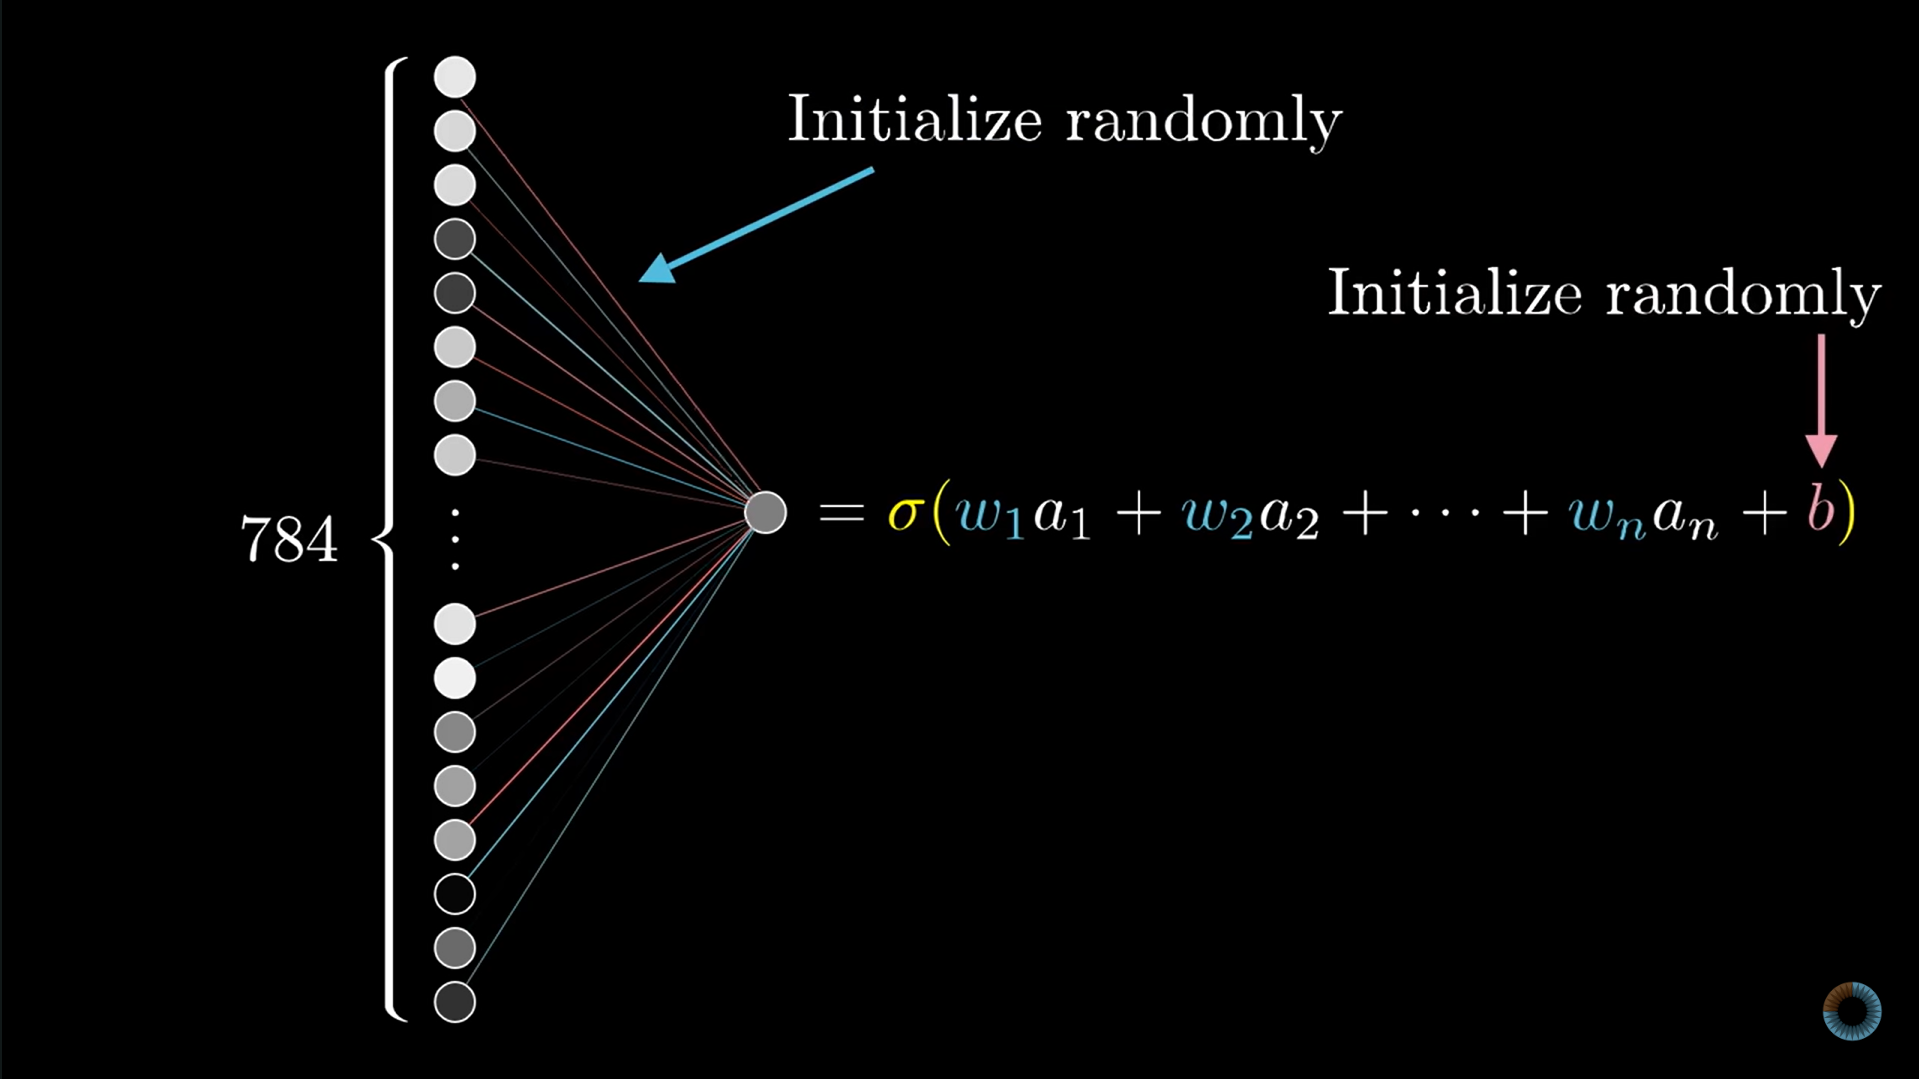

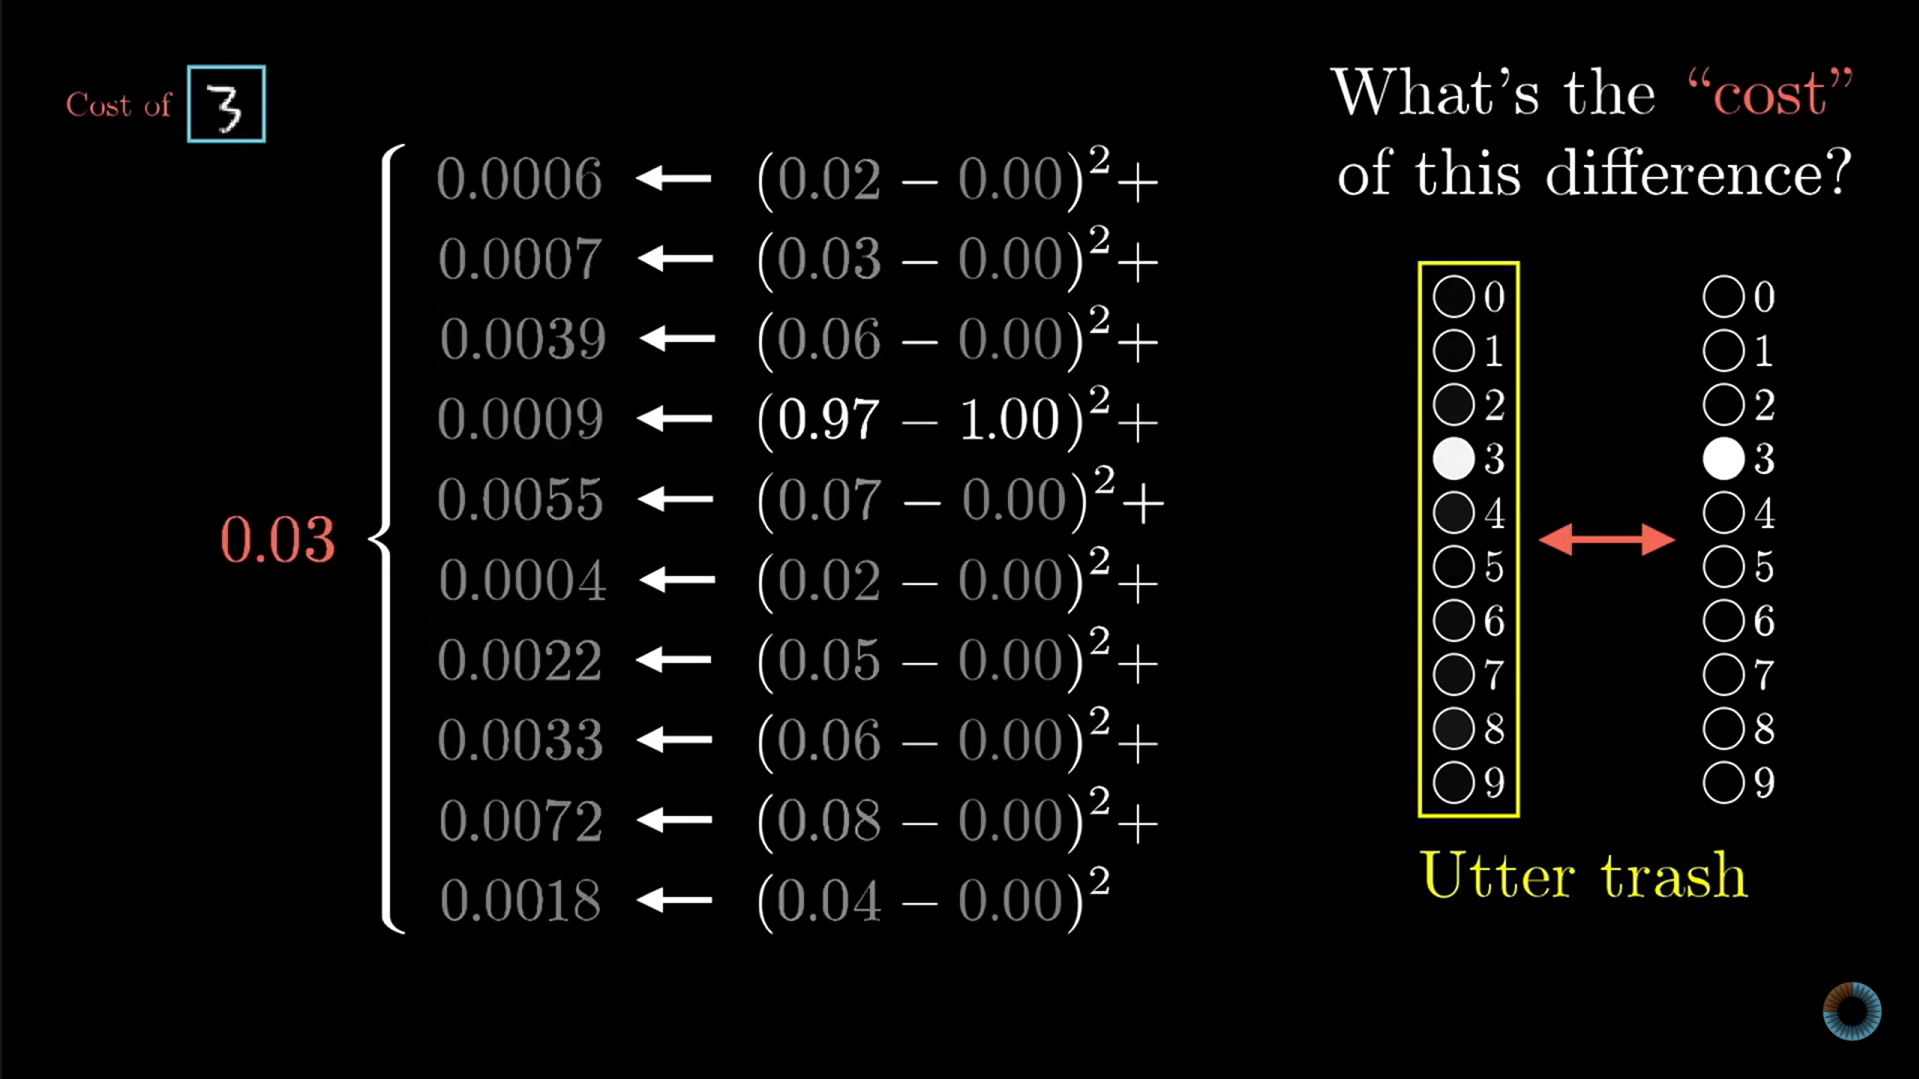

## Gradient Descent
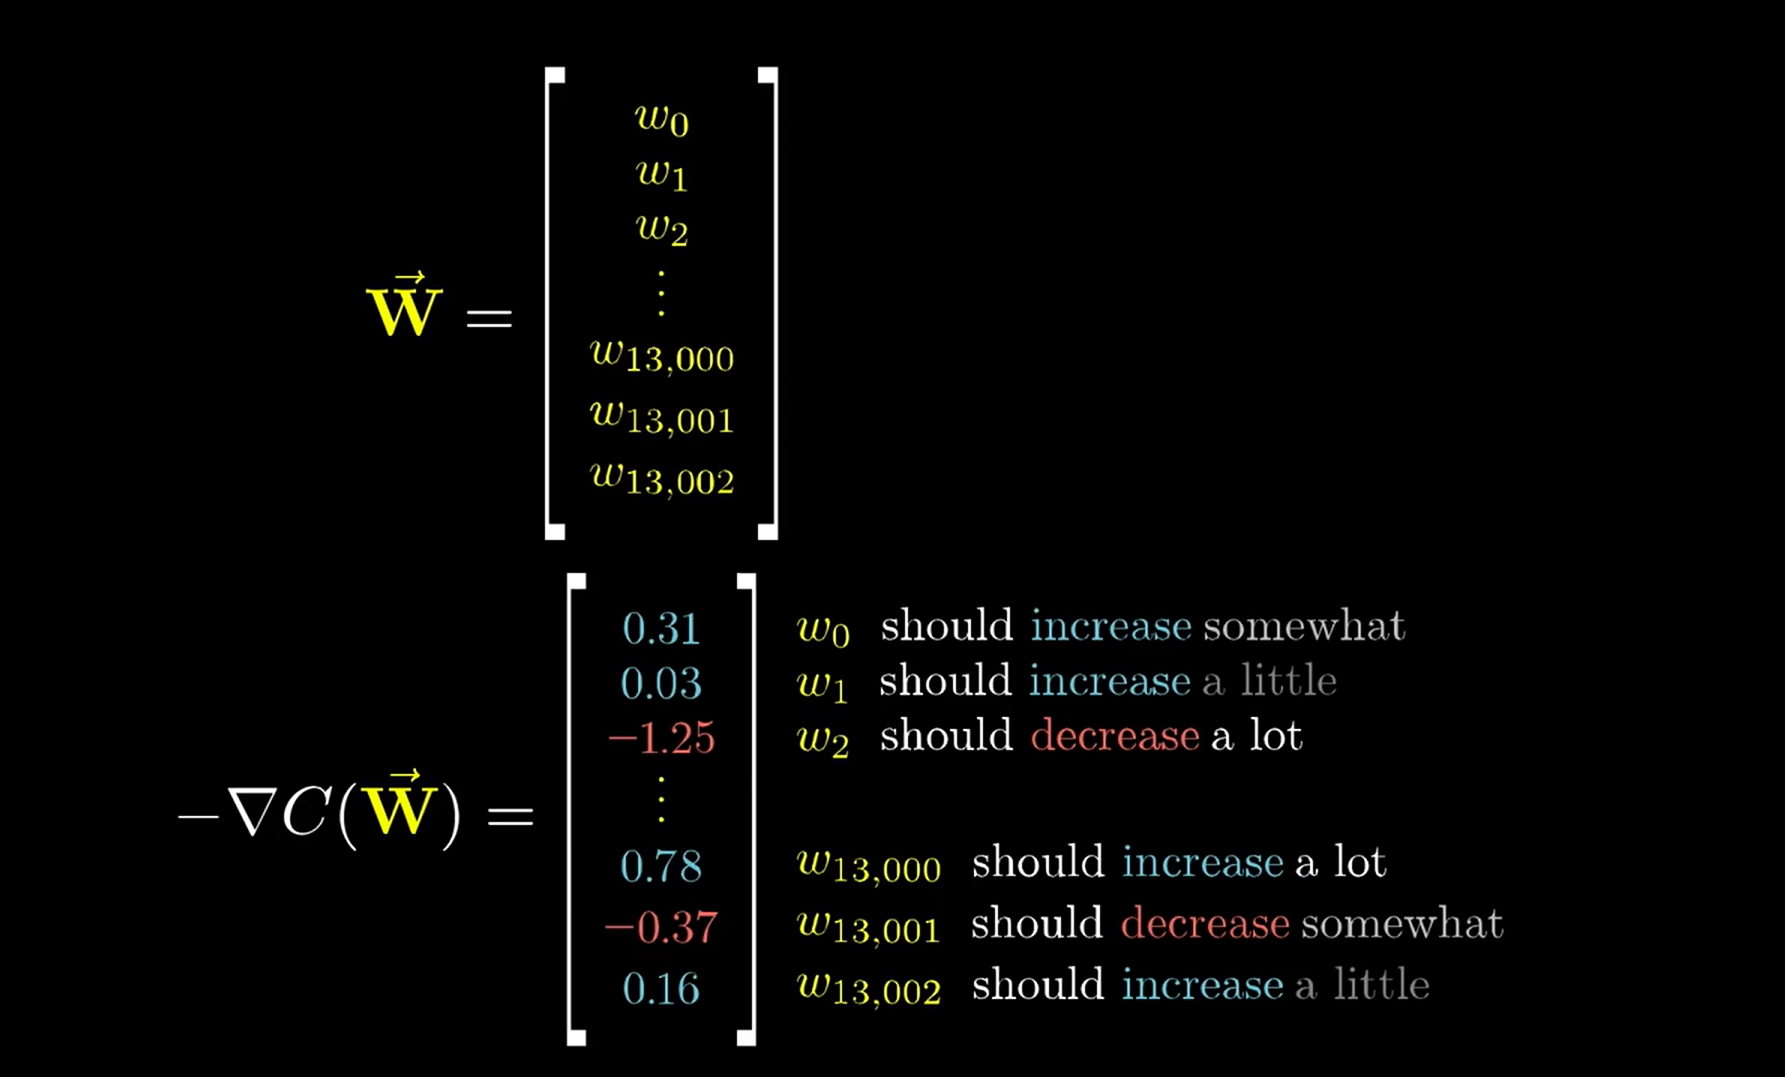

## Activation Functions
### Linear
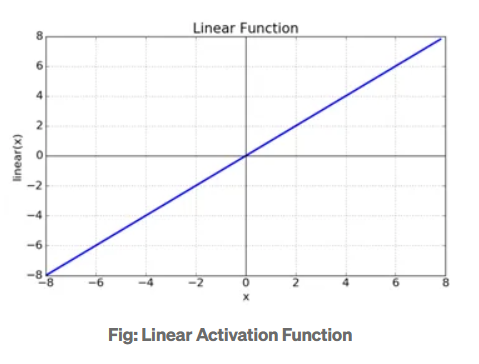
the output of the functions will not be confined between any range.
It doesn’t help with the complexity of various parameters of usual data that is fed to the neural networks.
### Non-Linear
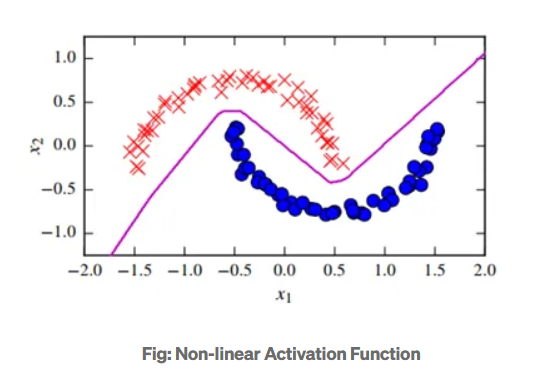
It makes it easy for the model to generalize or adapt to a variety of data and to differentiate between the outputs.


### Types of non-linear Activation functions


#### Sigmoid
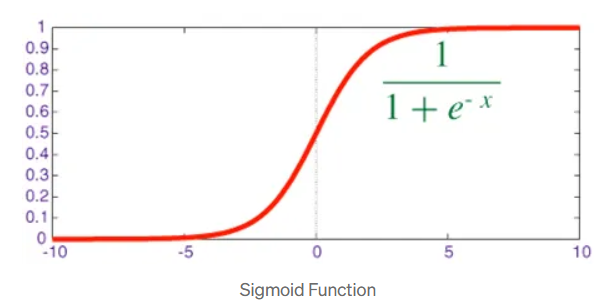

it is especially used for models where we have to predict the probability as an output.

The function is differentiable.

The logistic sigmoid function can cause a neural network to get stuck at the training time.

**softmax function is a more generalized logistic activation function that is used for multiclass classification.**

#### Tanh
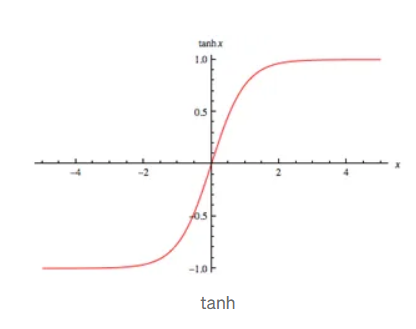

The tanh function is mainly used classification between two classes.

#### ReLU(Rectified Linear Unit)
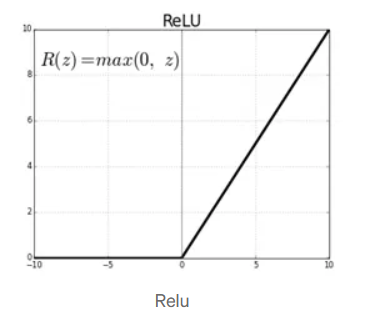

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turn affects the resulting graph by not mapping the negative values appropriately.

## Difference between Tensorflow & Keras ?
**TensorFlow** is an open-source library developed by Google

**Keras** is an open-source neural network library written in Python that runs on top of TensorFlow.
Keras acts as a **high-level API (frontend)**

### Weights Initialization

💡Proper initialization can help the network converge faster and avoid issues like **vanishing** or **exploding gradients**.

####  **Vanishing Gradients**
 occur when the gradients used to update the weights of a neural network during backpropagation become increasingly small as they propagate backward through the layers. This results in negligible weight updates, *hindering* the network’s ability to learn from the training data.

**Core Issue**

Minimal Weight Updates: Due to extremely small gradients, the weights are adjusted by minuscule amounts, leading to slow or stalled training.

**Consequence**

Ineffective Training: The network’s ability to learn complex patterns is compromised.

#### **Exploding gradients**

Exploding gradients are the opposite of vanishing gradients. Instead of gradients becoming infinitesimally small, they grow exponentially large during backpropagation. This leads to significant weight updates in the neural network.

**Core Issue**

Unstable Training: Large weight updates can destabilize the training process, causing the model’s parameters to diverge.

Oscillations: The network’s parameters might oscillate wildly, preventing convergence to an optimal solution.

**Consequence**

Divergence: The model fails to learn effectively and may produce erratic outputs.

##### Chain Rule
It is a concept in calculus, where it is used to compute the derivative of composite functions, crucial for backpropagation in neural networks.

- In Backpropagation: In neural networks, it’s used in backpropagation to calculate the gradient of the loss function with respect to each weight.
- Step-by-step calculation: We calculate how the error changes with respect to the output of the previous layer, then how that output changes with respect to the activation function, and finally, how the activation function changes with respect to the weight.
- Multiplying the effects: By multiplying these individual changes, we get the total impact of the weight on the error.

# import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten
from tensorflow.keras.optimizers import SGD

In [8]:
warnings.filterwarnings("ignore")

In [9]:
#load data
(X_train_ann, y_train_ann), (X_test_ann,y_test_ann) = tf.keras.datasets.mnist.load_data()

5


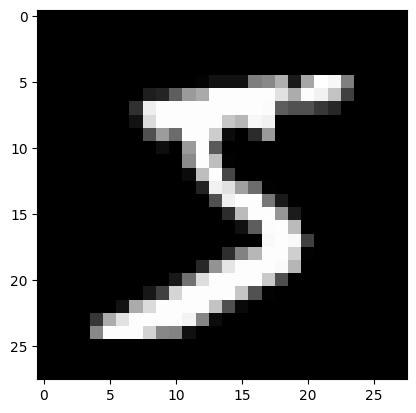

In [10]:
plt.imshow(X_train_ann[0],cmap = 'gray')
print(y_train_ann[0])
plt.show()

In [11]:
X_train_ann.shape

(60000, 28, 28)

In [12]:
X_train_ann[0].shape

(28, 28)

In [13]:
type(X_train_ann[0][0][0])


numpy.uint8

In [14]:
X_train_ann = X_train_ann.astype('float32')/255.0
X_test_ann = X_test_ann.astype('float32')/255.0
'''
This converts the pixel data from uint8 (integers between 0 and 255)
to float32 (32-bit floating-point numbers),
which are better suited for neural networks.
Most deep learning frameworks expect float inputs.
''';

In [15]:
ANN_model1 = tf.keras.models.Sequential(

    [
        Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256,activation = 'relu'),
        tf.keras.layers.Dense(128,activation = 'relu'),
        tf.keras.layers.Dense(64,activation= 'relu'),
        tf.keras.layers.Dense(32,activation= 'relu'),
        tf.keras.layers.Dense(18,activation= 'relu'),
        tf.keras.layers.Dense(10,activation= 'softmax')
    ]
)

| Feature                     | `categorical_crossentropy`                           | `sparse_categorical_crossentropy`                |
| --------------------------- | ---------------------------------------------------- | ------------------------------------------------ |
| Label format                | One-hot encoded vectors                              | Integer class labels                             |
| Example label for class `3` | `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`                     | `3`                                              |
| Commonly used when          | You manually convert labels using `to_categorical()` | You use raw integer labels (like `0–9`) directly |
| Faster                      | ❌ Slower (slightly)                                  | ✅ Faster (no one-hot conversion)                 |
| Memory efficient            | ❌ Uses more memory                                   | ✅ More memory efficient                          |


In [16]:
# Optimizer
optimizer_ann = SGD(learning_rate = 0.01)

In [17]:
ANN_model1.compile(optimizer_ann
             , loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


In [19]:
import time
start_time = time.time()
history = ANN_model1.fit(X_train_ann, y_train_ann,epochs = 50,batch_size=64, validation_split=0.1,callbacks=[early_stop])
trained_epochs = len(history.history['loss'])
trianing_time_avg_per_epoch = (time.time() - start_time)/trained_epochs
print (f"Avg Training Time per Epoch: {trianing_time_avg_per_epoch}")

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3409 - loss: 1.9217 - val_accuracy: 0.8663 - val_loss: 0.4806
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8649 - loss: 0.4565 - val_accuracy: 0.9255 - val_loss: 0.2729
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9107 - loss: 0.3093 - val_accuracy: 0.9377 - val_loss: 0.2191
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - loss: 0.2405 - val_accuracy: 0.9502 - val_loss: 0.1776
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9420 - loss: 0.2003 - val_accuracy: 0.9568 - val_loss: 0.1488
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9494 - loss: 0.1686 - val_accuracy: 0.9588 - val_loss: 0.1413
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9583 - loss: 0.1466 - val_accuracy: 0.9652 - val_loss: 0.1273
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9631 - loss: 0.1257 - val_accuracy: 0.

In [20]:
history.history['accuracy'][:5]

[0.5622777938842773,
 0.8783888816833496,
 0.915759265422821,
 0.9322222471237183,
 0.9431296586990356]

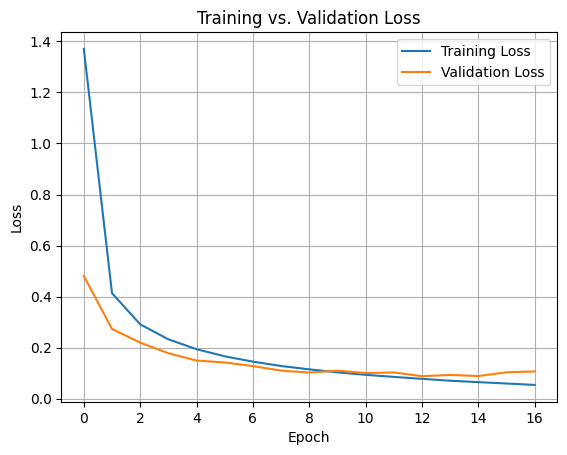

In [21]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
ANN_model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │           594 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,978 (956.95 KB)

 Trainable params: 244,976 (956.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
start_test = time.time()
test_loss, test_accuracy = ANN_model1.evaluate(X_test_ann, y_test_ann)
print("Test Accuracy:", test_accuracy)
test_time = (time.time() - start_test)
print(f"Test time: {test_time}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1169
Test Accuracy: 0.9695000052452087
Test time: 0.5868706703186035


In [24]:
pred = ANN_model1.predict(X_test_ann)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


tf.Tensor(7, shape=(), dtype=int64)


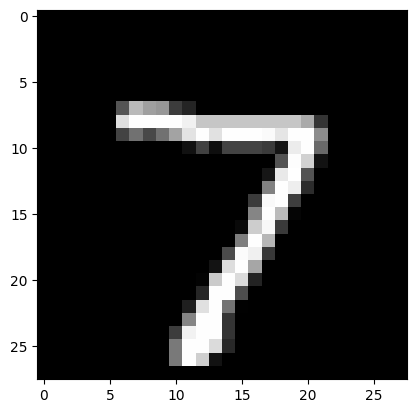

In [25]:
print(tf.argmax(pred[0]))
plt.imshow(X_test_ann[0],cmap= 'gray');
plt.show()

## start in CNN

In [26]:
# import pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training data shape before split: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

# split data to train val test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")

Training data shape before split: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)
Training data shape: (48000, 28, 28), Labels shape: (48000,)
Validation data shape: (12000, 28, 28), Labels shape: (12000,)


Training Set Class Distribution:
 0    4748
1    5420
2    4784
3    4912
4    4666
5    4317
6    4741
7    4966
8    4691
9    4755
Name: count, dtype: int64

Training Set Class Percentages:
 0     9.891667
1    11.291667
2     9.966667
3    10.233333
4     9.720833
5     8.993750
6     9.877083
7    10.345833
8     9.772917
9     9.906250
Name: count, dtype: float64


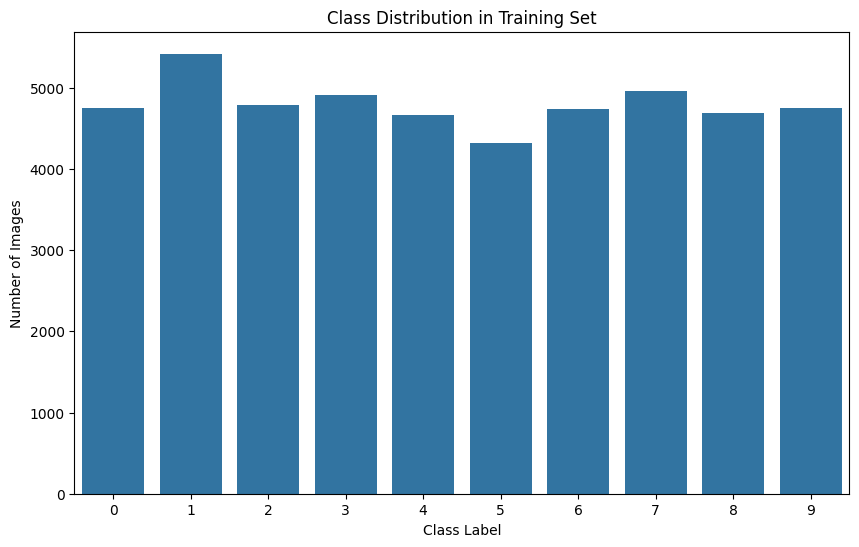

In [28]:
# Let's see how many number of images are in each class. We start with the train set and get percent ,can make plot graph for these

# Class distribution for training set
train_class_distribution = pd.Series(y_train).value_counts().sort_index()
print("Training Set Class Distribution:\n", train_class_distribution)

# Calculate percentages
train_class_percentages = (train_class_distribution / len(y_train)) * 100
print("\nTraining Set Class Percentages:\n", train_class_percentages)


# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.show()

In [29]:
# Reshape and normalize
# We have a 1D vector with 784 pixels and we have to reshape it to (28x28x1) before passing it to the CNN.
#reshape(samples, height, width, channels)

input_shape = (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [30]:
# Convert labels to one-hot encoding so the model can work with them correctly
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)

In [31]:
# Model 1: Base CNN
model_1 = Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # output layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_1.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
# Train the model
history_1 = model_1.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6731 - loss: 0.9694 - val_accuracy: 0.9575 - val_loss: 0.1405
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9579 - loss: 0.1399 - val_accuracy: 0.9717 - val_loss: 0.0942
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9741 - loss: 0.0870 - val_accuracy: 0.9779 - val_loss: 0.0784
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9810 - loss: 0.0649 - val_accuracy: 0.9778 - val_loss: 0.0765
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9824 - loss: 0.0567 - val_accuracy: 0.9812 - val_loss: 0.0639
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9837 - loss: 0.0493 - val_accuracy: 0.9822 - val_loss: 0.0598
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9867 - loss: 0.0433 - val_accuracy: 0.9813 - val_loss: 0.0638
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9888 - loss: 0.0383 - val_accuracy: 0.

In [32]:
start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_1.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9788 - loss: 0.0826
Test Loss: 0.06479237973690033
Test Accuracy: 0.9828000068664551
Avg Time taken for testing: 0.000091 seconds


In [33]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,814 (257.09 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,908 (128.55 KB)

**Try diff epochs**


In [34]:
# --- 10 ephoch ----
# Model 2
model_2 = Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_2.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=10
history_2 = model_2.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_2.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6195 - loss: 1.1523 - val_accuracy: 0.9526 - val_loss: 0.1576
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9563 - loss: 0.1376 - val_accuracy: 0.9656 - val_loss: 0.1162
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9696 - loss: 0.0980 - val_accuracy: 0.9662 - val_loss: 0.1051
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9778 - loss: 0.0723 - val_accuracy: 0.9748 - val_loss: 0.0835
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9799 - loss: 0.0608 - val_accuracy: 0.9782 - val_loss: 0.0731
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9843 - loss: 0.0514 - val_accuracy: 0.9801 - val_loss: 0.0676
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9856 - loss: 0.0480 - val_accuracy: 0.9803 - val_loss: 0.0666
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9870 - loss: 0.0390 - val_accuracy: 0.

In [35]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,814 (257.09 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,908 (128.55 KB)

In [36]:
# --- 5 ephoch ----
# Model 3
model_3 = Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_3.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=5
history_3 = model_3.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_3.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6468 - loss: 1.0545 - val_accuracy: 0.9497 - val_loss: 0.1776
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9564 - loss: 0.1349 - val_accuracy: 0.9677 - val_loss: 0.1048
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9718 - loss: 0.0911 - val_accuracy: 0.9767 - val_loss: 0.0752
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9790 - loss: 0.0672 - val_accuracy: 0.9774 - val_loss: 0.0750
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9818 - loss: 0.0582 - val_accuracy: 0.9795 - val_loss: 0.0674
Avg training time per epoch: 5.895037 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0738
Test Loss: 0.06076202541589737
Test Accuracy: 0.9815000295639038
Avg Time taken for testing: 0.000080 seconds


In [37]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,814 (257.09 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,908 (128.55 KB)

**=> We notice here ephoch=15 best choice and time not represent abig difference**

In [38]:
# ---Model4:Try diff learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    model_4 = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile with different learning rate
    optimizer = SGD(learning_rate=lr, momentum=0.9)
    model_4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and time
    start_time = time.time()
    epoch=15
    history_4 = model_4.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_val, y_val_cat),
                        verbose=0)
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Avg training time per epoch: {train_time/epoch:.6f} seconds")

    # Evaluate
    test_loss, test_acc = model_4.evaluate(X_test, y_test_cat, verbose=0)

    results.append({
        'learning_rate': lr,
        'final_val_accuracy': history_4.history['val_accuracy'][-1],
        'final_train_accuracy': history_4.history['accuracy'][-1],
        'test_accuracy': test_acc,
        'training_time': train_time
    })


df = pd.DataFrame(results)
display(df)



Training with learning rate = 0.1
Avg training time per epoch: 5.438904 seconds

Training with learning rate = 0.01
Avg training time per epoch: 5.383895 seconds

Training with learning rate = 0.001
Avg training time per epoch: 5.448735 seconds

Training with learning rate = 0.0001
Avg training time per epoch: 5.498316 seconds


learning_rate  final_val_accuracy  final_train_accuracy  test_accuracy  \
0         0.1000            0.215083              0.207208         0.2143   
1         0.0100            0.983000              0.994083         0.9823   
2         0.0010            0.976667              0.976396         0.9763   
3         0.0001            0.901917              0.894771         0.9050   

   training_time  
0      81.583565  
1      80.758426  
2      81.731020  
3      82.474744

In [39]:
model_4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,814 (257.09 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,908 (128.55 KB)

**=> We notice here learning rate = 0.01 best choice**

**NOW Try adding or removing layer at least 4 model**

In [40]:
# Model 5:
model_5 = Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    ## == remove conv layer -> let see effect
    # Conv2D(64, (3,3), activation='relu'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_5.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_5 = model_5.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_5.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7690 - loss: 0.7561 - val_accuracy: 0.9706 - val_loss: 0.0961
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9724 - loss: 0.0891 - val_accuracy: 0.9778 - val_loss: 0.0725
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9826 - loss: 0.0579 - val_accuracy: 0.9865 - val_loss: 0.0478
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9844 - val_loss: 0.0500
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9894 - loss: 0.0358 - val_accuracy: 0.9867 - val_loss: 0.0451
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9884 - val_loss: 0.0409
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9856 - val_loss: 0.0475
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9939 - loss: 0.0199 - val_accuracy: 0.

In [41]:
model_5.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,238 (848.59 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,620 (424.30 KB)

**Try add batch normalization layer**

What does Batch Normalization do?

When data enters a layer in a neural network, Batch Normalization (BN) does the following steps for each small group of data (called a batch):

- Calculate the mean: It checks what value the numbers are mostly around.
- Calculate the variance: It sees how spread out the numbers are from the mean.
- Normalize the numbers: It adjusts the values so they are centered around zero and have a standard size.
- Add its own touch: It applies a special scaling and shifting, which the network can learn during training.

Why do we use it?

- It makes training faster.
- It helps the network learn better.
- It keeps the behavior of the network more stable.
Sometimes, it can even replace Dropout.


In [42]:
# --- Model6: Add BN
model_6 = Sequential([
    Conv2D(16, (3,3)), BatchNormalization(), MaxPooling2D(),
    Conv2D(32, (3,3)), BatchNormalization(), MaxPooling2D(),
    Conv2D(64, (3,3)), BatchNormalization(), MaxPooling2D(),
    Flatten(),
    Dense(128),
    Dense(10, activation='softmax')
])


model_6.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_6 = model_6.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_6.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8929 - loss: 0.3699 - val_accuracy: 0.9680 - val_loss: 0.1044
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9776 - loss: 0.0733 - val_accuracy: 0.9738 - val_loss: 0.0876
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9737 - val_loss: 0.0850
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9869 - loss: 0.0413 - val_accuracy: 0.9758 - val_loss: 0.0809
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9791 - val_loss: 0.0715
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.9812 - val_loss: 0.0626
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9933 - loss: 0.0224 - val_accuracy: 0.9803 - val_loss: 0.0685
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9942 - loss: 0.0167 - 

In [43]:
model_6.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (64, 26, 26, 16)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (64, 26, 26, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (64, 13, 13, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (64, 11, 11, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (64, 11, 11, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (64, 5, 5, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (64, 3, 3, 64)         │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (64, 3, 3, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (64, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (64, 128)              │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (64, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,486 (259.71 KB)

 Trainable params: 33,130 (129.41 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 33,132 (129.43 KB)

In [44]:
# --- Model7:Deeper Network
model_7 = Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    Conv2D(64, (3,3), activation='relu',padding='same'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 4: Conv2D + ReLU
    Conv2D(128, (3,3), activation='relu',padding='same'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_7.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_7 = model_7.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=64,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_7.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7711 - loss: 0.7432 - val_accuracy: 0.9789 - val_loss: 0.0692
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9777 - loss: 0.0696 - val_accuracy: 0.9863 - val_loss: 0.0470
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9860 - loss: 0.0435 - val_accuracy: 0.9862 - val_loss: 0.0445
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9908 - loss: 0.0295 - val_accuracy: 0.9886 - val_loss: 0.0400
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9935 - loss: 0.0208 - val_accuracy: 0.9895 - val_loss: 0.0377
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9935 - loss: 0.0190 - val_accuracy: 0.9890 - val_loss: 0.0400
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9960 - loss: 0.0116 - val_accuracy: 0.9877 - val_loss: 0.0444
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9963 - loss: 0.0113 - 

In [45]:
model_7.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,774 (6.88 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 901,388 (3.44 MB)

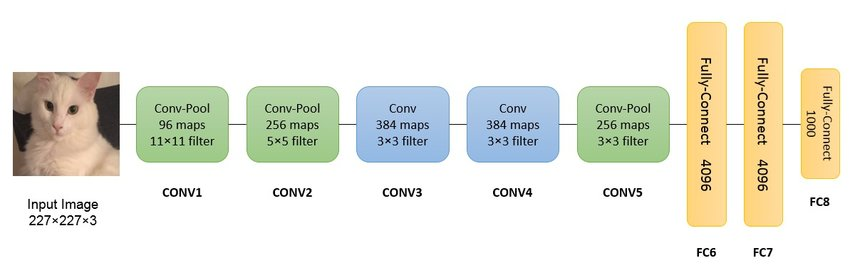

In [46]:
# --- Model 8: AlexNet-Inspired Architecture for MNIST ---
# Here not useful use "AlexNet" since data not the most efficient or necessary choice.But I want just try,you know
model_8 = Sequential(name="AlexNet_MNIST")

# Block 1
model_8.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same',
                   activation='relu', input_shape=(28, 28, 1)))
model_8.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(BatchNormalization())

# Block 2
model_8.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(BatchNormalization())

# Block 3
model_8.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_8.add(BatchNormalization())

# Block 4
model_8.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(BatchNormalization())

# Fully Connected Layers
model_8.add(Flatten())
model_8.add(Dense(512, activation='relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(256, activation='relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(10, activation='softmax'))

# Show model summary
model_8.summary()

# Compile the model
model_8.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
start_time = time.time()
epoch=15
history_8 = model_8.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=128,
                        validation_data=(X_val, y_val_cat),
                        callbacks=[EarlyStopping(patience=3)])
trained_epochs = len(history_8.history['loss'])
avg_train_time_8 = (time.time() - start_time) /trained_epochs
print(f"Avg Training Time on trained epochs: {avg_train_time_8:.6f} seconds/Epoch")

# Evaluate the model
start_test = time.time()
test_loss_8, test_accuracy_8 = model_8.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time_8 = (end_test - start_test) / X_test.shape[0]

print(f"Test Loss: {test_loss_8}")
print(f"Test Accuracy: {test_accuracy_8}")
print(f"Avg Time taken for testing: {test_time_8:.6f} seconds/sample")

# """
# Note:I try diff learning_rate and batch_size here
# and best choise
# learning_rate=0.001 & batch_size=128
# """

Model: "AlexNet_MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 7, 7, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,450 (2.28 MB)

 Trainable params: 596,874 (2.28 MB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - accuracy: 0.8474 - loss: 0.4905 - val_accuracy: 0.3901 - val_loss: 2.7280
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9814 - loss: 0.0699 - val_accuracy: 0.9833 - val_loss: 0.0593
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9867 - loss: 0.0478 - val_accuracy: 0.9903 - val_loss: 0.0384
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.9884 - loss: 0.0368 - val_accuracy: 0.9895 - val_loss: 0.0392
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9911 - loss: 0.0288 - val_accuracy: 0.9904 - val_loss: 0.0413
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9929 - loss: 0.0245 - val_accuracy: 0.9902 - val_loss: 0.0380
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9919 - loss: 0.0300 - val_accuracy: 0.9912 - val_loss: 0.0337
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9934 - loss: 0.0212 - 

**Here when try deeper network is better**

**=>Now try diff batch_sizes we already try 64 let's see if 32 or 128(excited)**

In [47]:
# --- Model9: batch_size=32 ----
model_9= Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_9.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_9 = model_9.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=32,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")


start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_9.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7570 - loss: 0.7416 - val_accuracy: 0.9630 - val_loss: 0.1211
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9671 - loss: 0.1070 - val_accuracy: 0.9723 - val_loss: 0.0913
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9767 - loss: 0.0736 - val_accuracy: 0.9786 - val_loss: 0.0701
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9811 - loss: 0.0577 - val_accuracy: 0.9803 - val_loss: 0.0658
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9852 - loss: 0.0445 - val_accuracy: 0.9787 - val_loss: 0.0657
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9875 - loss: 0.0369 - val_accuracy: 0.9788 - val_loss: 0.0719
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9820 - val_loss: 0.0653
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9915 - loss: 0.0261 

In [48]:
model_9.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,814 (257.09 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,908 (128.55 KB)

In [49]:
# --- Model10: batch_size=128 ----
model_10= Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_10.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_10 = model_10.fit(X_train, y_train_cat,
                        epochs=15,
                        batch_size=128,
                        validation_data=(X_val, y_val_cat))
avg_train_time = (time.time() - start_time)/epoch
print(f"Avg training time per epoch: {avg_train_time:.6f} seconds")


start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_10.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4841 - loss: 1.4655 - val_accuracy: 0.9352 - val_loss: 0.2114
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9386 - loss: 0.1926 - val_accuracy: 0.9512 - val_loss: 0.1562
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9608 - loss: 0.1282 - val_accuracy: 0.9675 - val_loss: 0.1050
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9682 - loss: 0.1022 - val_accuracy: 0.9755 - val_loss: 0.0865
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9737 - loss: 0.0828 - val_accuracy: 0.9735 - val_loss: 0.0826
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9777 - loss: 0.0705 - val_accuracy: 0.9785 - val_loss: 0.0718
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9811 - loss: 0.0616 - val_accuracy: 0.9762 - val_loss: 0.0784
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9823 - loss: 0.0570 - val_accu

In [50]:
model_10.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,814 (257.09 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,908 (128.55 KB)

**ah=> We notice here batch_size=32 best choice**

## **what is your think if we colloect the best choice from all the experience we have tried so far?**

In [51]:
# Best choices:
# epochs=15,
# learning_rate=0.01,
# batch_size=32'
# use deeper network architecture

# --- What is your opinion use early_stopping to avoid overfitting

# ---- Model11:Best one so far
model_11 = Sequential([
    # Layer 1: Conv2D + ReLU + MaxPooling
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + ReLU + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + ReLU + MaxPooling
    Conv2D(64, (3,3), activation='relu',padding='same'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 4: Conv2D + ReLU
    Conv2D(128, (3,3), activation='relu',padding='same'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_11.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_11 = model_11.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=32,
                        validation_data=(X_val, y_val_cat)
                        ,callbacks=[EarlyStopping(patience=3)]
                         )
trained_epochs = len(history_11.history['loss'])
avg_train_time_11 = (time.time() - start_time) /trained_epochs
print(f"Avg Training Time on trained epochs: {avg_train_time_11:.6f} seconds/Epoch")



start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_11.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 283s 188ms/step - accuracy: 0.8217 - loss: 0.5593 - val_accuracy: 0.9779 - val_loss: 0.0714
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9825 - loss: 0.0559 - val_accuracy: 0.9868 - val_loss: 0.0442
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9890 - loss: 0.0332 - val_accuracy: 0.9855 - val_loss: 0.0466
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9922 - loss: 0.0239 - val_accuracy: 0.9898 - val_loss: 0.0409
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9952 - loss: 0.0158 - val_accuracy: 0.9896 - val_loss: 0.0373
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9901 - val_loss: 0.0415
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9970 - loss: 0.0090 - val_accuracy: 0.9890 - val_loss: 0.0429
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9968

In [52]:
model_11.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,774 (6.88 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 901,388 (3.44 MB)

In [53]:
# ---- Model12:try activation function (elu -> exponantial linear unit)
# nearly no change happened from previous model
model_12 = Sequential([
    # Layer 1: Conv2D + elu + MaxPooling
    Conv2D(16, (3,3), activation='elu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + elu + MaxPooling
    Conv2D(32, (3,3), activation='elu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + elu + MaxPooling
    Conv2D(64, (3,3), activation='elu',padding='same'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 4: Conv2D + elu
    Conv2D(128, (3,3), activation='elu',padding='same'),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='elu'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_12.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_12 = model_12.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=32,
                        validation_data=(X_val, y_val_cat),
                        callbacks=[EarlyStopping(patience=3)])
trained_epochs = len(history_12.history['loss'])
avg_train_time_12 = (time.time() - start_time) /trained_epochs
print(f"Avg Training Time on trained epochs: {avg_train_time_12:.6f} seconds/Epoch")


start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_12.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8827 - loss: 0.3757 - val_accuracy: 0.9818 - val_loss: 0.0591
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9841 - loss: 0.0524 - val_accuracy: 0.9822 - val_loss: 0.0618
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 278s 185ms/step - accuracy: 0.9874 - loss: 0.0377 - val_accuracy: 0.9882 - val_loss: 0.0399
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9914 - loss: 0.0255 - val_accuracy: 0.9898 - val_loss: 0.0375
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9961 - loss: 0.0127 - val_accuracy: 0.9895 - val_loss: 0.0430
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9911 - val_loss: 0.0427
Avg Training Time on trained epochs: 55.646573 seconds/Epoch
313/313 ━━━━━

In [54]:
model_12.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,774 (6.88 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 901,388 (3.44 MB)

In [55]:
# ---- Model13:try activation function (swish)
# no accuracy improvement with very niglected change in time
model_13 = Sequential([
    # Layer 1: Conv2D + swish + MaxPooling
    Conv2D(16, (3,3), activation='swish', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 2: Conv2D + swish + MaxPooling
    Conv2D(32, (3,3), activation='swish', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 3: Conv2D + swish + MaxPooling
    Conv2D(64, (3,3), activation='swish',padding='same'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Layer 4: Conv2D + swish
    Conv2D(128, (3,3), activation='swish',padding='same'),
    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='swish'),
    # utput layer:10 neurons (for 10 classes)
    Dense(10, activation='softmax')
])

model_13.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15

history_13 = model_13.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=32,
                        validation_data=(X_val, y_val_cat),
                        callbacks=[EarlyStopping(patience=3)])
atrained_epochs = len(history_13.history['loss'])
avg_train_time_13 = (time.time() - start_time) /trained_epochs
print(f"Avg Training Time on trained epochs: {avg_train_time_13:.6f} seconds/Epoch")


start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_13.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5931 - loss: 1.1233 - val_accuracy: 0.9787 - val_loss: 0.0673
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9809 - loss: 0.0615 - val_accuracy: 0.9837 - val_loss: 0.0533
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9887 - loss: 0.0363 - val_accuracy: 0.9860 - val_loss: 0.0510
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9923 - loss: 0.0231 - val_accuracy: 0.9832 - val_loss: 0.0608
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9943 - loss: 0.0177 - val_accuracy: 0.9896 - val_loss: 0.0417
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9962 - loss: 0.0109 - val_accuracy: 0.9892 - val_loss: 0.0442
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.9882 - val_loss: 0.0470
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9989 -

In [56]:
model_13.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,774 (6.88 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 901,388 (3.44 MB)

In [57]:
# ---- Model14:try multiple activation functions
# this one better in time and accuracy ( best result till now)

model_14 = Sequential([
    Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', input_shape=(28,28,1),padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(64, (3,3), activation='swish',padding='same'),
    Conv2D(128, (3,3), activation='gelu',padding='same'),
    Flatten(),

    Dense(128, activation='selu'),
    Dense(10, activation='softmax')
])

model_14.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
epoch=15
history_14 = model_14.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=32,
                        validation_data=(X_val, y_val_cat),
                        callbacks=[EarlyStopping(patience=3)])
trained_epochs = len(history_14.history['loss'])
avg_train_time_14 = (time.time() - start_time) /trained_epochs
print(f"Avg Training Time on trained epochs: {avg_train_time_14:.6f} seconds/Epoch")


start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_14.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8309 - loss: 0.5074 - val_accuracy: 0.9820 - val_loss: 0.0580
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9859 - loss: 0.0440 - val_accuracy: 0.9880 - val_loss: 0.0395
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9906 - loss: 0.0279 - val_accuracy: 0.9874 - val_loss: 0.0439
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9909 - val_loss: 0.0336
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9908 - val_loss: 0.0360
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9972 - loss: 0.0078 - val_accuracy: 0.9884 - val_loss: 0.0426
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9976 - loss: 0.0083 - val_accuracy: 0.9907 - val_loss: 0.0401
Avg Training Time on trained epochs: 23.054570 seconds/Epoch
313/313 ━━━━━━━

In [58]:
model_14.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,774 (6.88 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 901,388 (3.44 MB)

In [59]:
# ---- Model15: try adam optimizer
# less accuracy than SGD but better in time (not so much)

model_15 = Sequential([
    Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(64, (3,3), activation='swish', padding='same'),
    Conv2D(128, (3,3), activation='gelu', padding='same'),
    Flatten(),

    Dense(128, activation='selu'),
    Dense(10, activation='softmax')
])

model_15.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()
epoch=15
history_15 = model_15.fit(X_train, y_train_cat,
                        epochs=epoch,
                        batch_size=32,
                        validation_data=(X_val, y_val_cat),
                        callbacks=[EarlyStopping(patience=3)])
trained_epochs = len(history_15.history['loss'])
avg_train_time_15 = (time.time() - start_time) /trained_epochs
print(f"Avg Training Time on trained epochs: {avg_train_time_15:.6f} seconds/Epoch")



start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_15.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.9126 - loss: 0.2821 - val_accuracy: 0.9713 - val_loss: 0.0897
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9791 - loss: 0.0665 - val_accuracy: 0.9826 - val_loss: 0.0592
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9858 - loss: 0.0458 - val_accuracy: 0.9815 - val_loss: 0.0652
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9883 - val_loss: 0.0454
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.9852 - val_loss: 0.0637
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9875 - val_loss: 0.0717
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9930 - loss: 0.0225 - val_accuracy: 0.9884 - val_loss: 0.0550
Avg Training Time on trained epochs: 28.872491 seconds/Epoch
313/313 ━━━━━━━

In [60]:
model_15.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,704,160 (10.32 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,802,774 (6.88 MB)

In [61]:
from tensorflow.keras.optimizers import RMSprop

# ---- Model16: try RMSprop  optimizer
# less accuracy than SGD and nearly equal in time

model_16 = Sequential([
    Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(64, (3,3), activation='swish', padding='same'),
    Conv2D(128, (3,3), activation='gelu', padding='same'),
    Flatten(),

    Dense(128, activation='selu'),
    Dense(10, activation='softmax')
])

model_16.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
start_time = time.time()
epoch=15
history_16 = model_16.fit(X_train, y_train_cat,
                        epochs=15,
                        batch_size=32,
                        validation_data=(X_val, y_val_cat),
                        callbacks=[EarlyStopping(patience=3)])
trained_epochs = len(history_16.history['loss'])
avg_train_time_16 = (time.time() - start_time) /trained_epochs
print(f"Avg Training Time on trained epochs: {avg_train_time_16:.6f} seconds/Epoch")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_16.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9131 - loss: 0.2783 - val_accuracy: 0.9765 - val_loss: 0.0758
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9819 - loss: 0.0618 - val_accuracy: 0.9768 - val_loss: 0.1106
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9884 - loss: 0.0445 - val_accuracy: 0.9877 - val_loss: 0.0464
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9893 - loss: 0.0343 - val_accuracy: 0.9897 - val_loss: 0.0396
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9866 - val_loss: 0.0679
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9938 - loss: 0.0238 - val_accuracy: 0.9898 - val_loss: 0.0548
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9955 - loss: 0.0165 - val_accuracy: 0.9886 - val_loss: 0.0521
Avg Training Time on trained epochs: 30.081737 seconds/Epoch
313/313 ━━━━━━━

In [62]:
model_16.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,774 (6.88 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 901,388 (3.44 MB)

### **Dropout Layer**

In [63]:
# ---- Model17: Dropout with different location: after second layer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

model_17 = Sequential([
    Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Dropout(0.25),

    Conv2D(64, (3,3), activation='swish', padding='same'),
    Conv2D(128, (3,3), activation= 'gelu', padding='same'),

    Flatten(),
    Dense(128, activation='elu'),
    Dense(10, activation='softmax')

])

model_17.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

history_17 = model_17.fit(X_train, y_train_cat,
                          epochs=15,
                          batch_size=32,
                          validation_data=(X_val, y_val_cat),
                          callbacks=[EarlyStopping(patience=3)])
end_time = time.time()
trained_epochs = len(history_17.history['loss'])
avg_train_time = (end_time - start_time)/trained_epochs

print(f"Average Training Time: {avg_train_time:.6f} seconds")

start_test = time.time()

test_loss, test_accuracy = model_17.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)/X_test.shape[0]
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5582 - loss: 1.4338 - val_accuracy: 0.9452 - val_loss: 0.1741
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9420 - loss: 0.1840 - val_accuracy: 0.9701 - val_loss: 0.0988
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9646 - loss: 0.1154 - val_accuracy: 0.9768 - val_loss: 0.0762
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9718 - loss: 0.0891 - val_accuracy: 0.9801 - val_loss: 0.0642
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9769 - loss: 0.0721 - val_accuracy: 0.9816 - val_loss: 0.0576
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9797 - loss: 0.0648 - val_accuracy: 0.9790 - val_loss: 0.0678
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9840 - loss: 0.0509 - val_accuracy: 0.9843 - val_loss: 0.0480
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9847 -

In [64]:
model_17.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,388 (3.44 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
# ---- Model18: Dropout with different locations: after Denes
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

model_18 = Sequential([
    Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(64, (3,3), activation='swish', padding='same'),
    Conv2D(128, (3,3), activation= 'gelu', padding='same'),

    Flatten(),
    Dense(128, activation='elu'),
    Dropout(0.25),
    Dense(10, activation='softmax')

])

model_18.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

history_18 = model_18.fit(X_train, y_train_cat,
                          epochs=15,
                          batch_size=32,
                          validation_data=(X_val, y_val_cat),
                          callbacks=[EarlyStopping(patience=3)])
end_time = time.time()
trained_epochs = len(history_18.history['loss'])
avg_train_time = (end_time - start_time)/trained_epochs

print(f"Average Training Time: {avg_train_time:.6f} seconds")

start_test = time.time()
test_loss, test_accuracy = model_18.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5364 - loss: 1.4795 - val_accuracy: 0.9416 - val_loss: 0.1911
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9461 - loss: 0.1807 - val_accuracy: 0.9673 - val_loss: 0.1063
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9657 - loss: 0.1076 - val_accuracy: 0.9766 - val_loss: 0.0782
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9749 - loss: 0.0806 - val_accuracy: 0.9785 - val_loss: 0.0747
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9786 - loss: 0.0670 - val_accuracy: 0.9825 - val_loss: 0.0585
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9826 - loss: 0.0551 - val_accuracy: 0.9836 - val_loss: 0.0554
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9838 - loss: 0.0515 - val_accuracy: 0.9813 - val_loss: 0.0632
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9867 -

In [66]:
model_18.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,388 (3.44 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [67]:
# ---- Model19: Dropout with different drupout rate : 0.2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

model_19 = Sequential([
    Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Dropout(0.2),

    Conv2D(64, (3,3), activation='swish', padding='same'),
    Conv2D(128, (3,3), activation='gelu', padding='same'),

    Flatten(),
    Dense(128, activation='elu'),
    Dense(10, activation='softmax')

])

model_19.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

history_19 = model_19.fit(X_train, y_train_cat,
                          epochs=15,
                          batch_size=32,
                          validation_data=(X_val, y_val_cat),
                          callbacks=[EarlyStopping(patience=3)])
end_time = time.time()
trained_epochs = len(history_19.history['loss'])
avg_train_time = (end_time - start_time)/trained_epochs

print(f"Average Training Time: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_19.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5572 - loss: 1.4157 - val_accuracy: 0.9499 - val_loss: 0.1656
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9435 - loss: 0.1775 - val_accuracy: 0.9671 - val_loss: 0.1076
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9649 - loss: 0.1104 - val_accuracy: 0.9758 - val_loss: 0.0780
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9724 - loss: 0.0867 - val_accuracy: 0.9796 - val_loss: 0.0690
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9761 - loss: 0.0729 - val_accuracy: 0.9818 - val_loss: 0.0571
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9809 - loss: 0.0579 - val_accuracy: 0.9853 - val_loss: 0.0506
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9838 - loss: 0.0508 - val_accuracy: 0.9847 - val_loss: 0.0533
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9849 -

In [68]:
model_19.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,388 (3.44 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [69]:
# ---- Model20: Dropout with different drupout rate : 0.3
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

model_20 = Sequential([
     Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Dropout(0.3),

    Conv2D(64, (3,3), activation='swish', padding='same'),
    Conv2D(128, (3,3), activation= 'gelu', padding='same'),

    Flatten(),
    Dense(128, activation='elu'),
    Dense(10, activation='softmax')

])

model_20.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

history_20 = model_20.fit(X_train, y_train_cat,
                          epochs=15,
                          batch_size=32,
                          validation_data=(X_val, y_val_cat),
                          callbacks=[EarlyStopping(patience=3)])
end_time = time.time()
trained_epochs = len(history_20.history['loss'])
avg_train_time = (end_time - start_time)/trained_epochs

print(f"Average Training Time: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_20.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5392 - loss: 1.4978 - val_accuracy: 0.9463 - val_loss: 0.1784
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9387 - loss: 0.1920 - val_accuracy: 0.9671 - val_loss: 0.1082
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9626 - loss: 0.1162 - val_accuracy: 0.9757 - val_loss: 0.0804
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9702 - loss: 0.0931 - val_accuracy: 0.9809 - val_loss: 0.0640
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9769 - loss: 0.0705 - val_accuracy: 0.9827 - val_loss: 0.0586
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9784 - loss: 0.0648 - val_accuracy: 0.9843 - val_loss: 0.0511
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9823 - loss: 0.0572 - val_accuracy: 0.9871 - val_loss: 0.0447
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9849 -

In [70]:
model_20.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_76 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,388 (3.44 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [71]:
# ---- Model21: Dropout with different drupout rate : 0.4
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

model_21 = Sequential([
    Conv2D(16, (3,3), activation='leaky_relu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(32, (3,3), activation='elu', input_shape=(28,28,1), padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Dropout(0.4),

    Conv2D(64, (3,3), activation='swish', padding='same'),
    Conv2D(128, (3,3), activation= 'gelu', padding='same'),

    Flatten(),
    Dense(128, activation='elu'),
    Dense(10, activation='softmax')

])

model_21.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

history_21 = model_21.fit(X_train, y_train_cat,
                          epochs=15,
                          batch_size=32,
                          validation_data=(X_val, y_val_cat),
                          callbacks=[EarlyStopping(patience=3)])
end_time = time.time()
trained_epochs = len(history_21.history['loss'])
avg_train_time = (end_time - start_time)/trained_epochs

print(f"Average Training Time: {avg_train_time:.6f} seconds")

start_test = time.time()
# Evaluate the model on test data using the one-hot encoded labels
test_loss, test_accuracy = model_21.evaluate(X_test, y_test_cat)
end_test = time.time()
test_time =(end_test - start_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Avg Time taken for testing: {test_time:.6f} seconds")

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5665 - loss: 1.3378 - val_accuracy: 0.9437 - val_loss: 0.1765
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9366 - loss: 0.1962 - val_accuracy: 0.9644 - val_loss: 0.1113
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9602 - loss: 0.1238 - val_accuracy: 0.9794 - val_loss: 0.0745
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9716 - loss: 0.0895 - val_accuracy: 0.9814 - val_loss: 0.0645
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9746 - loss: 0.0808 - val_accuracy: 0.9818 - val_loss: 0.0572
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9778 - loss: 0.0693 - val_accuracy: 0.9851 - val_loss: 0.0510
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9813 - loss: 0.0588 - val_accuracy: 0.9853 - val_loss: 0.0481
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9818 -

In [72]:
model_21.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,388 (3.44 MB)

 Trainable params: 901,386 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)